Гистограмма исходного изображения:


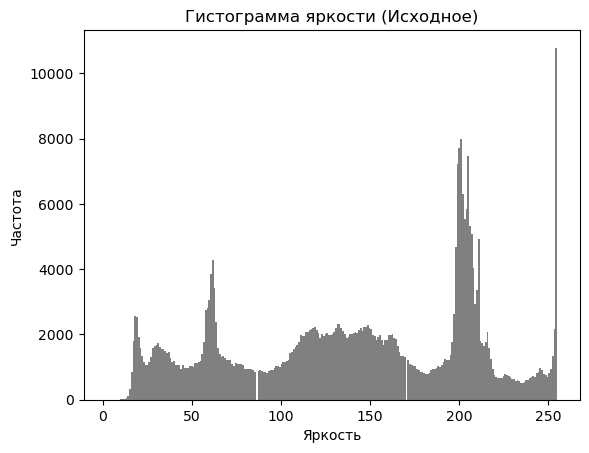

C:\Users\79258\AppData\Local\Temp\ipykernel_55940\116531221.py:20: RuntimeWarning: overflow encountered in scalar subtract
  ngtdm[pixel_value, abs(pixel_value - neighbor_value)] += 1


COS (Исходное): 21760.1089, CON (Исходное): 88.2316, BUS (Исходное): 6440.3150
NGTDM (Исходное):


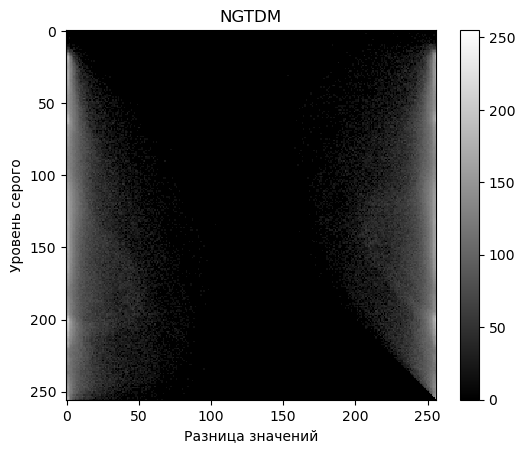

Гистограмма контрастированного изображения:


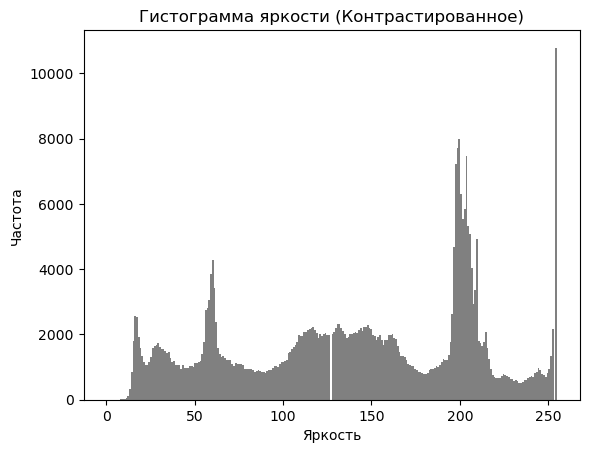

COS (Контрастированное): 21754.7343, CON (Контрастированное): 88.2316, BUS (Контрастированное): 6440.3150
NGTDM (Контрастированное):


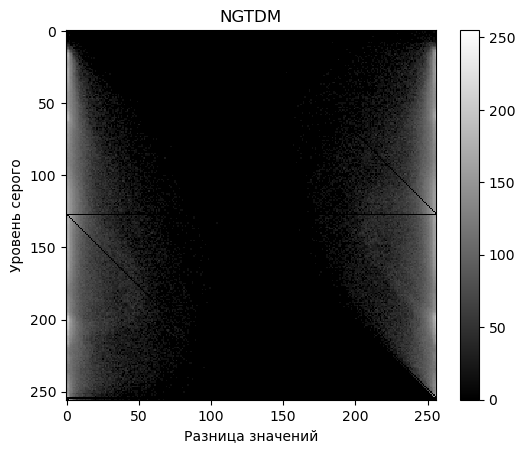

Текстурные признаки (Исходное):


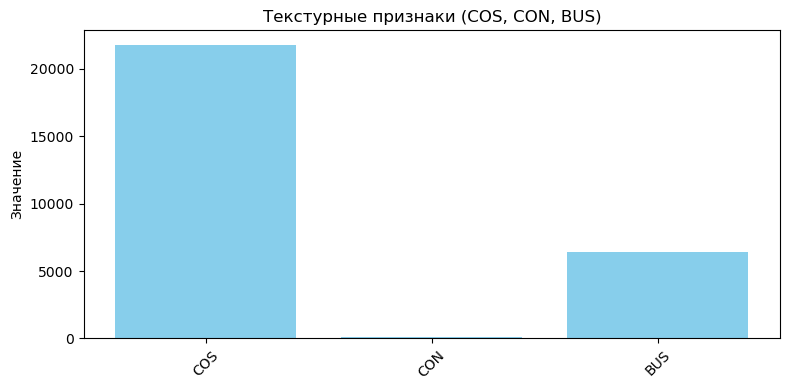

Текстурные признаки (Контрастированное):


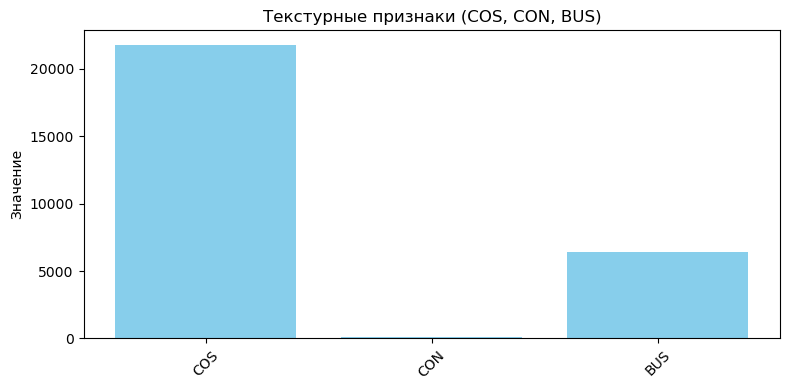

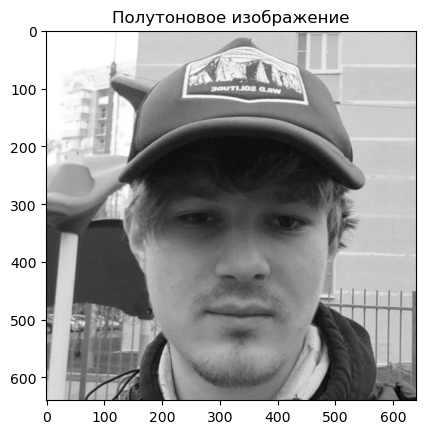

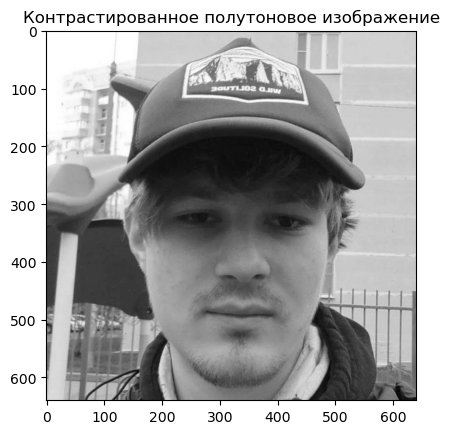

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def calculate_ngtdm(gray_image, d=1):
    """Вычисляет матрицу NGTDM."""
    height, width = gray_image.shape
    max_gray_level = gray_image.max()
    ngtdm = np.zeros((max_gray_level + 1, max_gray_level + 1), dtype=np.int64)
    for y in range(height):
        for x in range(width):
            pixel_value = gray_image[y, x]
            neighbors = []
            if x > d -1: neighbors.append(gray_image[y, x - d])
            if x < width - d: neighbors.append(gray_image[y, x + d])
            if y > d -1: neighbors.append(gray_image[y - d, x])
            if y < height - d: neighbors.append(gray_image[y + d, x])
            for neighbor_value in neighbors:
                ngtdm[pixel_value, abs(pixel_value - neighbor_value)] += 1
    return ngtdm

def calculate_ngtdm_features(ngtdm):
    """Вычисляет признаки COS, CON, BUS."""
    ngtdm = ngtdm.astype(np.float64)
    total_pixels = np.sum(ngtdm)
    if total_pixels == 0:
        return 0.0, 0.0, 0.0
    cos = np.sum(ngtdm * np.arange(ngtdm.shape[1])**2) / total_pixels
    con = np.sum(ngtdm * np.arange(ngtdm.shape[1])) / total_pixels
    bus = np.sum(ngtdm) / np.sum(np.sum(ngtdm, axis=1) > 0)
    return cos, con, bus

def linear_contrast_stretching(gray_image):
    """Применяет линейное контрастирование."""
    min_val = np.min(gray_image)
    max_val = np.max(gray_image)
    if max_val == min_val:
        return gray_image
    contrast_image = ((gray_image - min_val) / (max_val - min_val)) * 255
    return contrast_image.astype(np.uint8)

def load_and_convert_to_grayscale(image_path):
    """Загружает изображение и преобразует в полутоновое."""
    img = Image.open(image_path).convert("L")
    return np.array(img)

def plot_histogram(gray_image, title):
    """Строит гистограмму яркости."""
    plt.hist(gray_image.flatten(), bins=256, color='gray')
    plt.title(title)
    plt.xlabel("Яркость")
    plt.ylabel("Частота")
    plt.show()

def visualize_ngtdm(ngtdm, log_scale=False):
    """Визуализирует NGTDM."""
    if log_scale:
        ngtdm = np.log1p(ngtdm)
        ngtdm = (ngtdm / np.max(ngtdm) * 255).astype(np.uint8)
    plt.imshow(ngtdm, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title("NGTDM")
    plt.xlabel("Разница значений")
    plt.ylabel("Уровень серого")
    plt.show()

def visualize_features(features, feature_names):
    """Визуализирует текстурные признаки."""
    plt.figure(figsize=(8, 4))
    plt.bar(feature_names, features, color='skyblue')
    plt.title("Текстурные признаки (COS, CON, BUS)")
    plt.ylabel("Значение")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    image_path = "image3.png"  # Замените на путь к вашему изображению
    gray_image = load_and_convert_to_grayscale(image_path)

    print("Гистограмма исходного изображения:")
    plot_histogram(gray_image, "Гистограмма яркости (Исходное)")

    ngtdm_original = calculate_ngtdm(gray_image, d=1)
    cos_original, con_original, bus_original = calculate_ngtdm_features(ngtdm_original)
    print(f"COS (Исходное): {cos_original:.4f}, CON (Исходное): {con_original:.4f}, BUS (Исходное): {bus_original:.4f}")

    print("NGTDM (Исходное):")
    visualize_ngtdm(ngtdm_original, log_scale=True)

    contrasted_image = linear_contrast_stretching(gray_image)

    print("Гистограмма контрастированного изображения:")
    plot_histogram(contrasted_image, "Гистограмма яркости (Контрастированное)")

    ngtdm_contrasted = calculate_ngtdm(contrasted_image, d=1)
    cos_contrasted, con_contrasted, bus_contrasted = calculate_ngtdm_features(ngtdm_contrasted)
    print(f"COS (Контрастированное): {cos_contrasted:.4f}, CON (Контрастированное): {con_contrasted:.4f}, BUS (Контрастированное): {bus_contrasted:.4f}")

    print("NGTDM (Контрастированное):")
    visualize_ngtdm(ngtdm_contrasted, log_scale=True)

    feature_names = ["COS", "CON", "BUS"]
    features_original = (cos_original, con_original, bus_original)
    features_contrasted = (cos_contrasted, con_contrasted, bus_contrasted)

    print("Текстурные признаки (Исходное):")
    visualize_features(features_original, feature_names)

    print("Текстурные признаки (Контрастированное):")
    visualize_features(features_contrasted, feature_names)

    plt.imshow(gray_image, cmap='gray')
    plt.title("Полутоновое изображение")
    plt.show()

    plt.imshow(contrasted_image, cmap='gray')
    plt.title("Контрастированное полутоновое изображение")
    plt.show()

if __name__ == "__main__":
    main()

Диапазон L: min=2, max=235


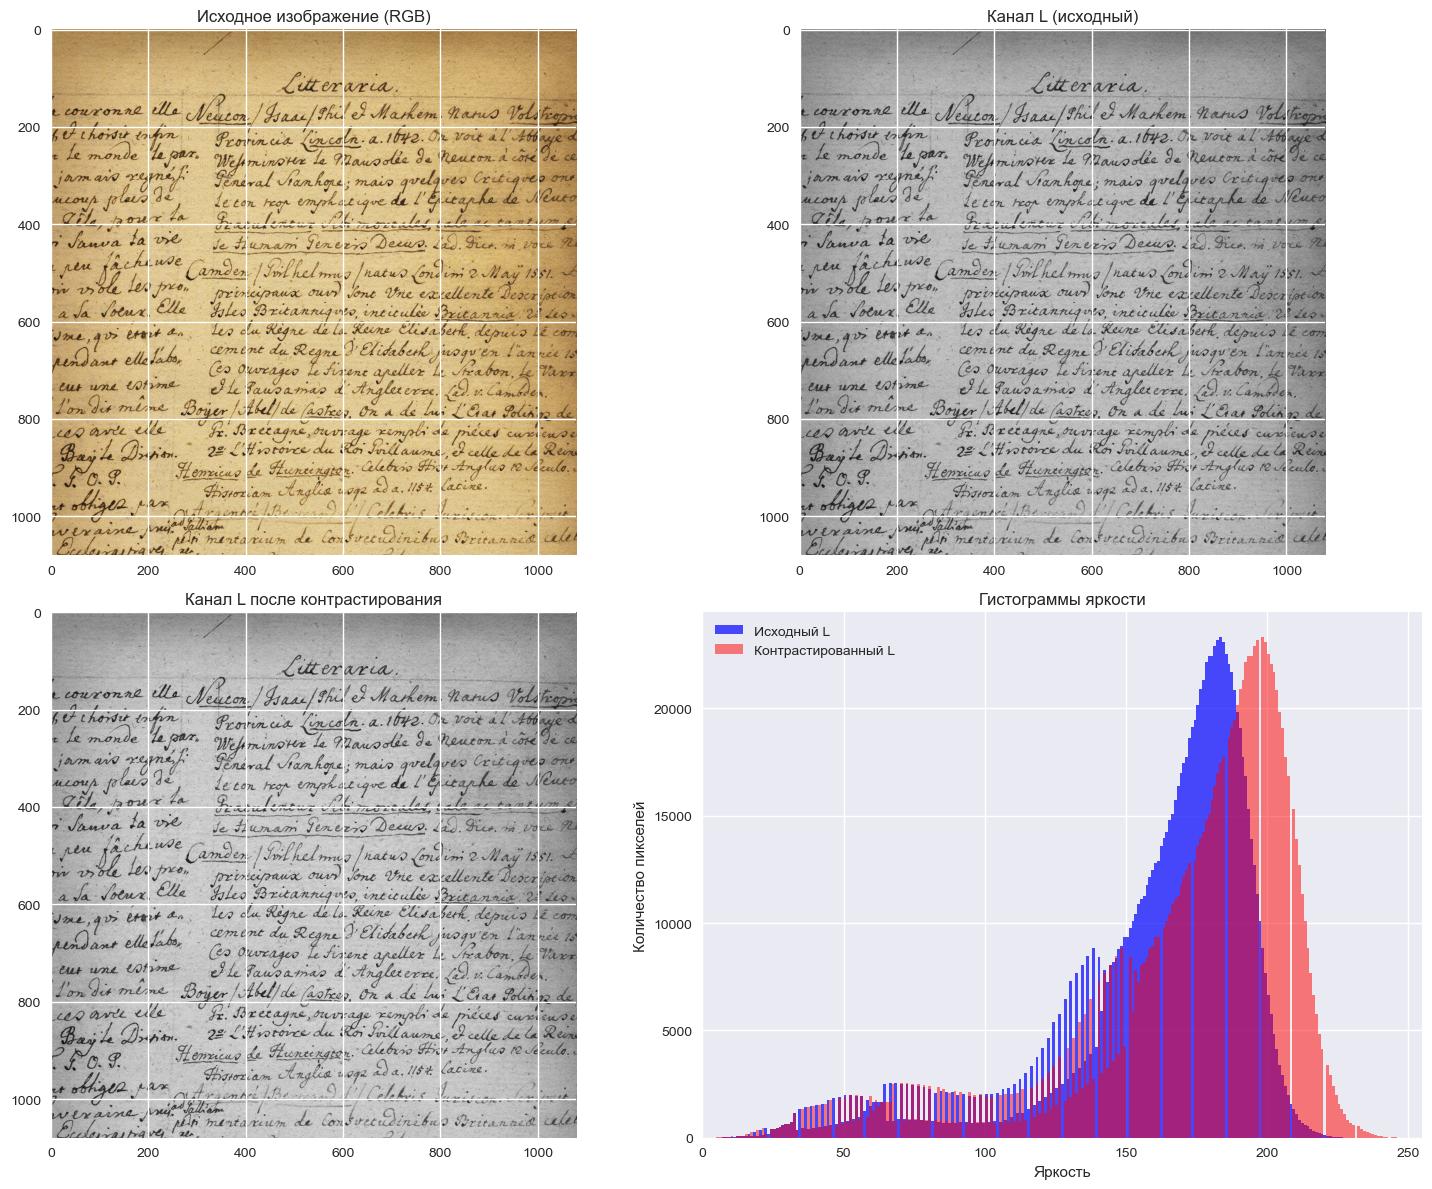

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Загрузка изображения ---
image = cv2.imread('gugu.jpg')  # Проверьте путь!
if image is None:
    raise ValueError("Изображение не загружено! Проверьте путь.")

# --- 2. Конвертация в HSL и извлечение L ---
hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
H, L, S = cv2.split(hsl)

# Проверяем диапазон L (должен быть 0-255)
print(f"Диапазон L: min={L.min()}, max={L.max()}")

# --- 3. Линейное контрастирование ---
def linear_contrast_stretching(L):
    L_min, L_max = L.min(), L.max()
    L_contrast = ((L.astype(np.float32) - L_min) / (L_max - L_min)) * 255
    return L_contrast.astype(np.uint8)

L_contrast = linear_contrast_stretching(L)

# --- 4. Визуализация ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Исходное изображение (цветное и L)
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Исходное изображение (RGB)')
axes[0, 1].imshow(L, cmap='gray', vmin=0, vmax=255)  # Явно задаём диапазон
axes[0, 1].set_title('Канал L (исходный)')

# Контрастированное изображение
axes[1, 0].imshow(L_contrast, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Канал L после контрастирования')

# Гистограммы
axes[1, 1].hist(L.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7, label='Исходный L')
axes[1, 1].hist(L_contrast.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Контрастированный L')
axes[1, 1].set_xlim(0, 255)  # Фиксируем ось X
axes[1, 1].set_xlabel('Яркость')
axes[1, 1].set_ylabel('Количество пикселей')
axes[1, 1].legend()
axes[1, 1].set_title('Гистограммы яркости')

plt.tight_layout()
plt.show()

In [124]:
def compute_ngtdm(image, d=1):
    padded = np.pad(image, d, mode='reflect')
    ngtdm = np.zeros_like(image, dtype=np.float32)
    
    for i in range(d, image.shape[0] + d):
        for j in range(d, image.shape[1] + d):
            neighborhood = padded[i-d:i+d+1, j-d:j+d+1]
            mean_neighbor = np.mean(neighborhood)
            ngtdm[i-d, j-d] = np.abs(padded[i, j] - mean_neighbor)
    
    return ngtdm

# Вычисляем NGTDM для исходного и контрастированного L
ngtdm_original = compute_ngtdm(L, d=1)
ngtdm_contrast = compute_ngtdm(L_contrast, d=1)

In [125]:
def ngtdm_features(ngtdm):
    # Coarseness (COS)
    COS = 1 / (1 + np.mean(ngtdm))
    
    # Contrast (CON)
    CON = np.var(ngtdm)
    
    # Busyness (BUS)
    BUS = np.sum(ngtdm) / (ngtdm.size)
    
    return COS, CON, BUS

# Признаки для исходного и контрастированного изображения
COS_orig, CON_orig, BUS_orig = ngtdm_features(ngtdm_original)
COS_contr, CON_contr, BUS_contr = ngtdm_features(ngtdm_contrast)


[[ 0.22222222  5.7777777   5.5555553  ...  8.444445    5.5555553
   8.444445  ]
 [10.777778   10.111111    3.7777777  ...  6.888889    5.3333335
   6.        ]
 [ 4.7777777   6.          4.4444447  ...  2.2222223   8.
   9.777778  ]
 ...
 [ 9.777778    4.4444447   9.111111   ...  5.111111    9.888889
   9.555555  ]
 [ 1.3333334   1.         10.         ...  6.5555553   3.5555556
   5.6666665 ]
 [ 6.888889   16.444445    8.         ...  7.         17.
   6.888889  ]]
[[ 0.         6.111111   6.        ...  9.222222   6.111111   9.111111 ]
 [11.777778  11.555555   4.3333335 ...  7.3333335  6.         6.5555553]
 [ 5.4444447  6.6666665  5.        ...  2.2222223  9.111111  11.111111 ]
 ...
 [10.555555   4.4444447 10.222222  ...  5.4444447 10.888889  10.777778 ]
 [ 1.6666666  1.3333334 11.222222  ...  7.5555553  3.8888888  6.2222223]
 [ 7.5555553 18.11111    8.888889  ...  8.111111  18.666666   7.5555553]]


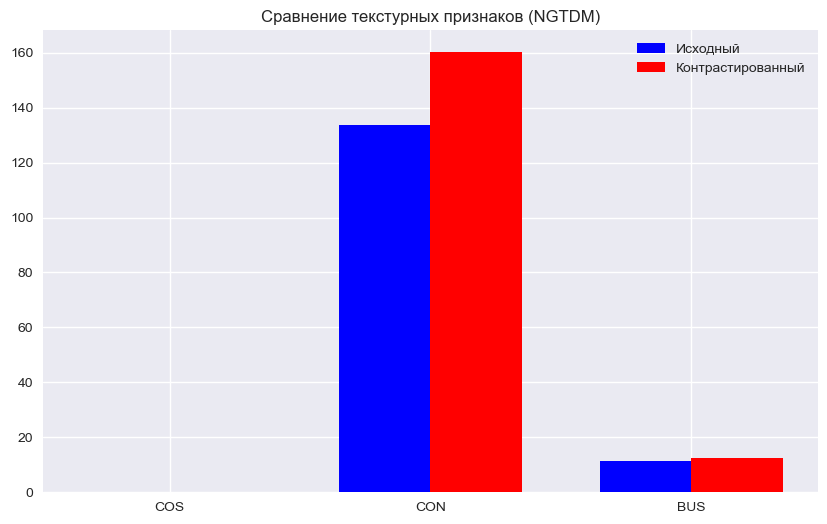

In [140]:

print(ngtdm_original)
print(ngtdm_contrast)
# Столбчатая диаграмма признаков
features = ['COS', 'CON', 'BUS']
original_values = [COS_orig, CON_orig, BUS_orig]
contrast_values = [COS_contr, CON_contr, BUS_contr]

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_values, width, label='Исходный', color='blue')
rects2 = ax.bar(x + width/2, contrast_values, width, label='Контрастированный', color='red')

ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()
ax.set_title('Сравнение текстурных признаков (NGTDM)')
plt.show()

In [130]:
print("Текстурные признаки (NGTDM, d=1):")
print(f"Исходное изображение → COS: {COS_orig:.3f}, CON: {CON_orig:.3f}, BUS: {BUS_orig:.3f}")
print(f"Контрастированное   → COS: {COS_contr:.3f}, CON: {CON_contr:.3f}, BUS: {BUS_contr:.3f}")

Текстурные признаки (NGTDM, d=1):
Исходное изображение → COS: 0.080, CON: 133.721, BUS: 11.528
Контрастированное   → COS: 0.073, CON: 160.133, BUS: 12.619
